# Compare scores by educational backgrounds

## Load Data

In [1]:
head(read.csv("./Data/education.csv"))

,X1,X88,X1.1,X1.2
,<int>,<int>,<int>,<int>
1,1,89,2,2
2,1,90,3,3
3,1,90,1,4
4,1,90,2,5
5,1,90,3,1
6,1,71,1,2


In [3]:
classScore <- read.csv("./Data/education.csv", header = F)
head(classScore)
tail(classScore)

,V1,V2,V3,V4
,<int>,<int>,<int>,<int>
1,1,88,1,1
2,1,89,2,2
3,1,90,3,3
4,1,90,1,4
5,1,90,2,5
6,1,90,3,1


,V1,V2,V3,V4
,<int>,<int>,<int>,<int>
43,2,89,1,3
44,2,89,2,4
45,2,89,3,5
46,2,89,1,1
47,2,89,2,2
48,2,89,3,3


## Data Cleanup

Memo  
- V1: "man", "woman"
- V2: score
- V3: "English", "Math", "Physics"
- V4: "classA", "classB", "classC", "classD", "classE"

In [4]:
str(classScore)

'data.frame':	48 obs. of  4 variables:
 $ V1: int  1 1 1 1 1 1 1 1 1 1 ...
 $ V2: int  88 89 90 90 90 90 71 72 72 72 ...
 $ V3: int  1 2 3 1 2 3 1 2 3 1 ...
 $ V4: int  1 2 3 4 5 1 2 3 4 5 ...


In [5]:
unique(classScore$V1)
unique(classScore$V2)
unique(classScore$V3)
unique(classScore$V4)

[1] 1 2

[1] 88 89 90 71 72 92 95

[1] 1 2 3

[1] 1 2 3 4 5

### encode as factor

In [6]:
classScore$V1 <- factor(classScore$V1, levels = 1:2, labels = c("man", "woman"))
classScore$V3 <- factor(classScore$V3, levels = 1:3, labels = c("English", "Math", "Physics"))
classScore$V4 <- factor(classScore$V4, levels = 1:5, labels = c("classA", "classB", "classC", "classD", "classE"))

In [7]:
str(classScore)

'data.frame':	48 obs. of  4 variables:
 $ V1: Factor w/ 2 levels "man","woman": 1 1 1 1 1 1 1 1 1 1 ...
 $ V2: int  88 89 90 90 90 90 71 72 72 72 ...
 $ V3: Factor w/ 3 levels "English","Math",..: 1 2 3 1 2 3 1 2 3 1 ...
 $ V4: Factor w/ 5 levels "classA","classB",..: 1 2 3 4 5 1 2 3 4 5 ...


In [8]:
head(classScore)

,V1,V2,V3,V4
,<fct>,<int>,<fct>,<fct>
1,man,88,English,classA
2,man,89,Math,classB
3,man,90,Physics,classC
4,man,90,English,classD
5,man,90,Math,classE
6,man,90,Physics,classA


### allocate colnames

In [9]:
colnames(classScore) <- c("Gender", "Score", "Subject", "Class")

In [10]:
head(classScore)

,Gender,Score,Subject,Class
,<fct>,<int>,<fct>,<fct>
1,man,88,English,classA
2,man,89,Math,classB
3,man,90,Physics,classC
4,man,90,English,classD
5,man,90,Math,classE
6,man,90,Physics,classA


## Plots

In [31]:
table(classScore$Class)

# nrow(subset(classScore, Class == "classA"))
# nrow(subset(classScore, Class == "classB"))
# nrow(subset(classScore, Class == "classC"))
# nrow(subset(classScore, Class == "classD"))
# nrow(subset(classScore, Class == "classE"))


classA classB classC classD classE 
    10     10     10      9      9 

In [32]:
table(classScore$Class, classScore$Gender)

        
         man woman
  classA   5     5
  classB   5     5
  classC   5     5
  classD   5     4
  classE   5     4

In [33]:
table(classScore$Class, classScore$Subject)

        
         English Math Physics
  classA       4    3       3
  classB       3    4       3
  classC       3    3       4
  classD       3    3       3
  classE       3    3       3

### Average by Class

In [155]:
classMean <- c()
for (i in c("classA", "classB", "classC", "classD", "classE")){
    classMeanCalc <- round(mean(subset(classScore, Class == i)[,2]),2)
    classMean <- c(classMean, classMeanCalc)
    cat(paste(i, ": ", classMeanCalc),"\n")
}


# mean(subset(classScore, Class == "classA")[,2])
# mean(subset(classScore, Class == "classB")[,2])
# mean(subset(classScore, Class == "classC")[,2])
# mean(subset(classScore, Class == "classD")[,2])
# mean(subset(classScore, Class == "classE")[,2])

classA :  88.9 
classB :  86.5 
classC :  87.4 
classD :  87.22 
classE :  89 


In [156]:
classMean

[1] 88.90 86.50 87.40 87.22 89.00

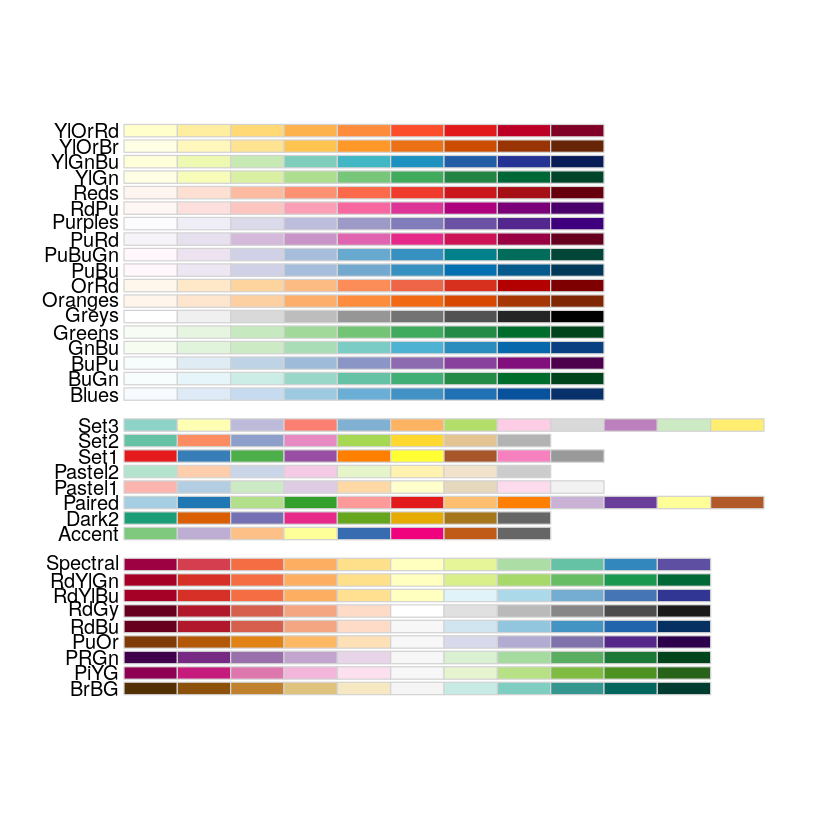

In [151]:
#install.packages("RColorBrewer").

library(RColorBrewer)
display.brewer.all()

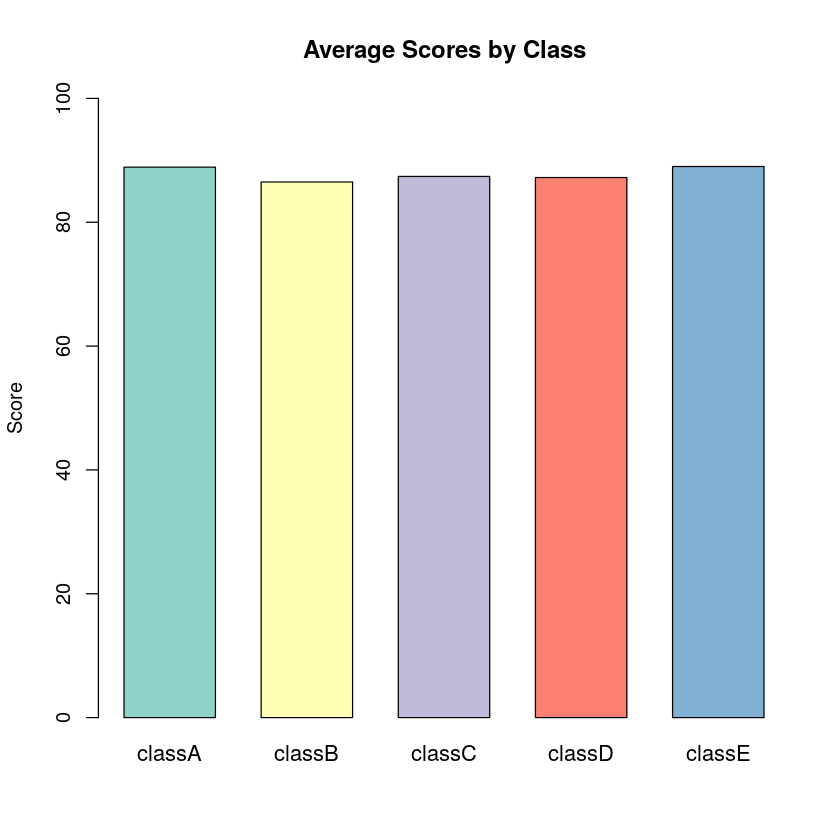

In [175]:
barplot(classMean,
        ylim = c(0, 100),
        main = "Average Scores by Class",
        col = brewer.pal(n = 5, name = "Set3"),
        names = c("classA", "classB", "classC", "classD", "classE"),
        cex.names = 1.1,
        ylab = "Score",
        space = 0.5,
        )

### Average by Subject

In [29]:
subjectMean <- c()
Subject <- unique(classScore$Subject) # c("English", "Math", "Physics")

for (i in Subject){
    subjectMeanCalc <- mean(subset(classScore, Subject == i)[,2])
    subjectMean <- c(subjectMean, subjectMeanCalc)
    cat(paste(i, ": ", subjectMeanCalc),"\n")
}

# mean(subset(classScore, Class == "classA" & Subject == "English")[,2])
# mean(subset(classScore, Class == "classB" & Subject == "English")[,2])
# mean(subset(classScore, Class == "classC" & Subject == "English")[,2])
# mean(subset(classScore, Class == "classD" & Subject == "English")[,2])

English :  87.25 
Math :  87.375 
Physics :  88.75 


In [30]:
subjectMean

[1] 87.250 87.375 88.750

In [81]:
# install.packages("viridis")
library("viridis")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: viridisLite



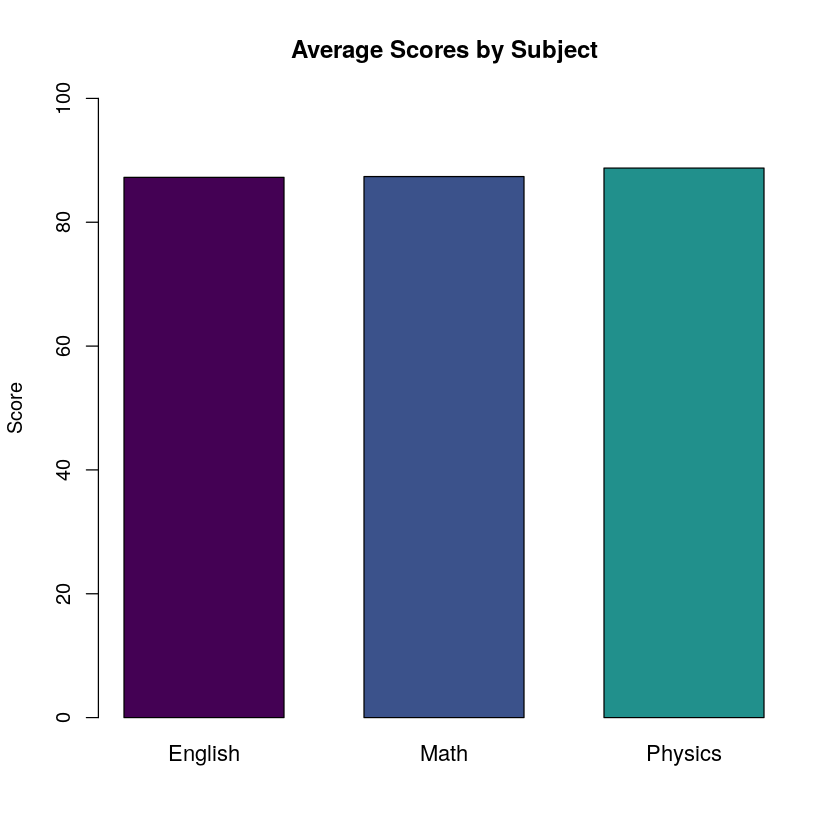

In [176]:
barplot(subjectMean,
        ylim = c(0, 100),
        main = "Average Scores by Subject",
        col = viridis(5),
        names = unique(classScore$Subject),
        cex.names = 1.1,
        ylab = "Score",
        space = 0.5,
        )

### Average by Class and Subject

In [152]:
classSubjectMean <- c()
Class <- unique(classScore$Class)
Subject <- unique(classScore$Subject)

for (i in Class){
    for (j in Subject){
        classSubjectMeanCalc = round(mean(subset(classScore, Class == i & Subject == j)[,2]),2)
        classSubjectMean <- c(classSubjectMean, classSubjectMeanCalc)
        cat(paste(i, j, ": ", classSubjectMeanCalc), "\n")
    }
    cat(paste("\n"))
}


classA English :  89.25 
classA Math :  85 
classA Physics :  92.33 

classB English :  86 
classB Math :  89.5 
classB Physics :  83 

classC English :  83 
classC Math :  86.33 
classC Physics :  91.5 

classD English :  92.33 
classD Math :  83 
classD Physics :  86.33 

classE English :  85 
classE Math :  92.33 
classE Physics :  89.67 



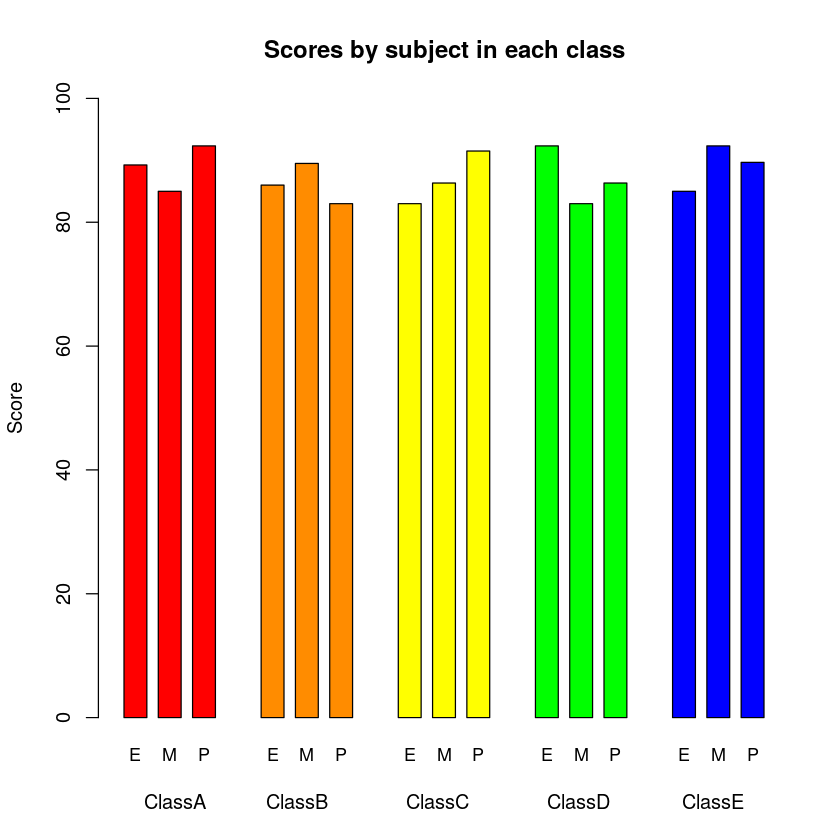

In [153]:
barplot(classSubjectMean,
        space = rep(c(2, 0.5, 0.5), 5),
        col =  c(rep(c("red"),3), rep(c("dark orange"),3), rep(c("yellow"),3), 
                 rep(c("green"),3), rep(c("blue"),3)),
        ylim = c(0, 100),
        xlab = "ClassA          ClassB             ClassC             ClassD            ClassE",
        ylab = "Score",
        names = rep(c("E", "M", "P"),5),
        cex.names = 0.9,
        main = "Scores by subject in each class"
       )

### Average by Subject and Class

In [67]:
classSubjectMean <- c()
Class <- unique(classScore$Class)
Subject <- unique(classScore$Subject)

for (i in Subject){
    for (j in Class){
        classSubjectMeanCalc = round(mean(subset(classScore, Class == j & Subject == i)[,2]),2)
        classSubjectMean <- c(classSubjectMean, classSubjectMeanCalc)
        cat(paste(i, j, ": ", classSubjectMeanCalc), "\n")
    }
    cat(paste("\n"))
}


English classA :  89.25 
English classB :  86 
English classC :  83 
English classD :  92.33 
English classE :  85 

Math classA :  85 
Math classB :  89.5 
Math classC :  86.33 
Math classD :  83 
Math classE :  92.33 

Physics classA :  92.33 
Physics classB :  83 
Physics classC :  91.5 
Physics classD :  86.33 
Physics classE :  89.67 



In [68]:
classSubjectMean

[1] 89.25 86.00 83.00 92.33 85.00 85.00 89.50 86.33 83.00 92.33 92.33 83.00
[13] 91.50 86.33 89.67

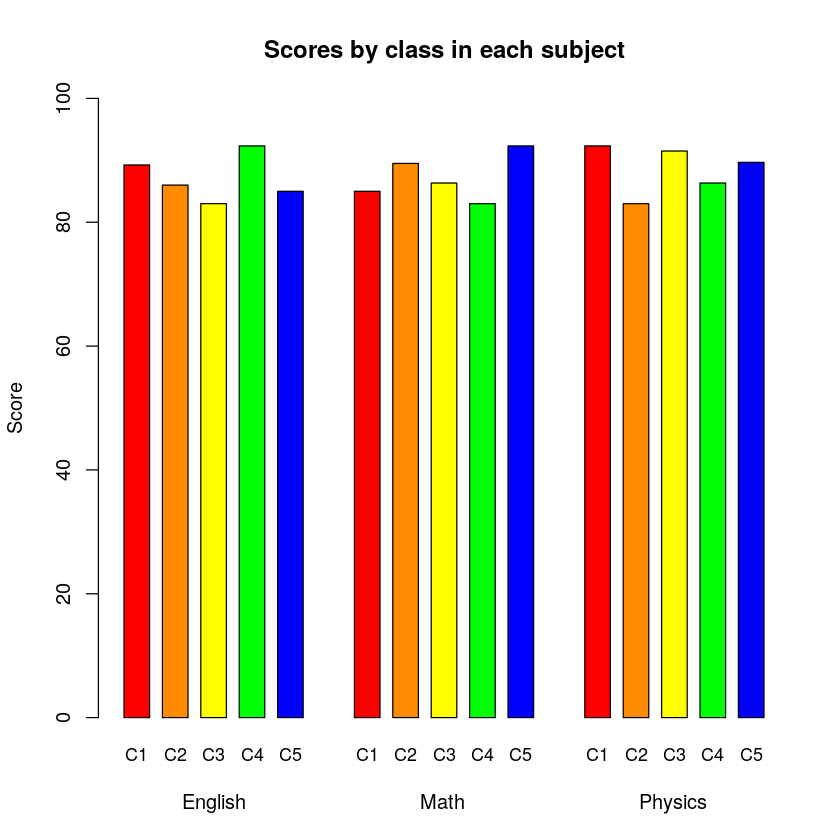

In [133]:
barplot(classSubjectMean,
        space = rep(c(2, 0.5, 0.5, 0.5, 0.5),3),
        col = c("red", "dark orange", "yellow", "green", "blue"),
        ylim = c(0, 100),
        xlab = "English                             Math                             Physics",
        ylab = "Score",
        names = rep(c("C1", "C2", "C3", "C4", "C5"),3),
        cex.names = 0.9,
        main = "Scores by class in each subject"
       )

### Summary

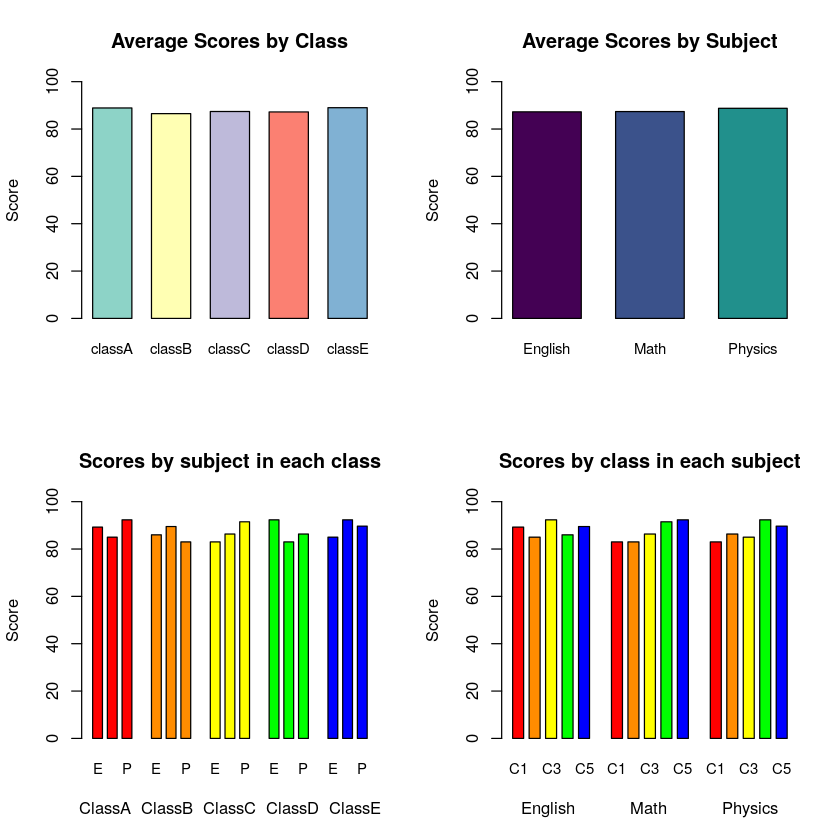

In [189]:
par(mfrow = c(2,2)) 

barplot(classMean,
        ylim = c(0, 100),
        main = "Average Scores by Class",
        col = brewer.pal(n = 5, name = "Set3"),
        names = c("classA", "classB", "classC", "classD", "classE"),
        cex.names = 0.9,
        ylab = "Score",
        space = 0.5,
        )

barplot(subjectMean,
        ylim = c(0, 100),
        main = "Average Scores by Subject",
        col = viridis(5),
        names = unique(classScore$Subject),
        cex.names = 0.9,
        ylab = "Score",
        space = 0.5,
        )

barplot(classSubjectMean,
        space = rep(c(2, 0.5, 0.5), 5),
        col =  c(rep(c("red"),3), rep(c("dark orange"),3), rep(c("yellow"),3), 
                 rep(c("green"),3), rep(c("blue"),3)),
        ylim = c(0, 100),
        xlab = "ClassA  ClassB  ClassC  ClassD  ClassE",
        ylab = "Score",
        names = rep(c("E", "M", "P"),5),
        cex.names = 0.9,
        main = "Scores by subject in each class"
       )

barplot(classSubjectMean,
        space = rep(c(2, 0.5, 0.5, 0.5, 0.5),3),
        col = c("red", "dark orange", "yellow", "green", "blue"),
        ylim = c(0, 100),
        xlab = "English           Math           Physics",
        ylab = "Score",
        names = rep(c("C1", "C2", "C3", "C4", "C5"),3),
        cex.names = 0.9,
        main = "Scores by class in each subject"
       )
